In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

# Getting Data

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train         # The images are in gray scale

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
len(X_train), X_train[0].shape

(60000, (28, 28))

![image.png](attachment:image.png)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizing the data

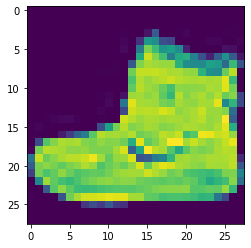

In [ ]:
# Let's plot the first image for reference

plt.imshow(X_train[0])

In [ ]:
y_train[0]                # These means it is an ankle boot

9

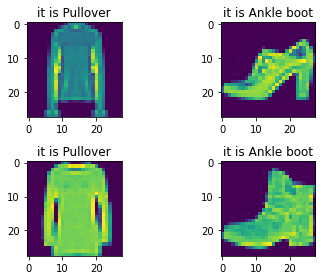

In [ ]:
# Lets plot few more images

for i in range(1, 5):
    axes = plt.subplot(2, 2, i)
    num = np.random.randint(0, len(X_train))
    plt.imshow(X_train[num])
    plt.title(f"it is {class_names[y_train[num]]}")

plt.tight_layout()

# Data Normalization

In [ ]:
X_train_norm = X_train / 255
X_test_norm = X_test / 255

In [ ]:
pd.Series(y_test).unique()

array([9, 2, 1, 6, 4, 5, 7, 3, 8, 0], dtype=uint8)

# Building model

<div class="alert alert-block alert-info">
<b>Tip:</b> 
 
 - Here the input data to the model will be (28, 28). So we will use a flatten layer as input layer to convert (28, 28)  (1,784)

 -  The outdata will be a 10 neuron layer and output activation function will be softmax so that we can get the output for all 10 values and based on highest we can consider as its label

    
</div>

In [ ]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
    
    
    
])

model.compile(

    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]

)


history = model.fit(X_train_norm, y_train, epochs = 10, validation_data = (X_test_norm, y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4924 - accuracy: 0.8237 - val_loss: 0.3991 - val_accuracy: 0.8559
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3648 - accuracy: 0.8670 - val_loss: 0.3868 - val_accuracy: 0.8577
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3312 - accuracy: 0.8783 - val_loss: 0.3552 - val_accuracy: 0.8730
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3074 - accuracy: 0.8867 - val_loss: 0.3603 - val_accuracy: 0.8718
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2937 - accuracy: 0.8895 - val_loss: 0.3450 - val_accuracy: 0.8755
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2780 - accuracy: 0.8959 - val_loss: 0.3539 - val_accuracy: 0.8713
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2649 - accuracy: 0.9003 - val_loss: 0.3481 - val_accuracy:

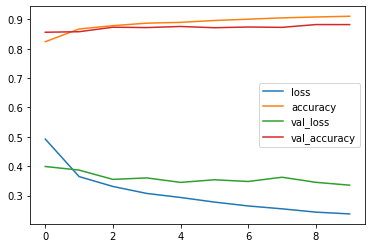

In [ ]:
pd.DataFrame(history.history).plot()

# Finding Optimal Learning Rate

In [ ]:
model2 = tf.keras.Sequential([
             tf.keras.layers.Flatten(input_shape = (28, 28)),
             tf.keras.layers.Dense(100, activation = "relu"),
             tf.keras.layers.Dense(100, activation = "relu"),   
             tf.keras.layers.Dense(10, activation = "softmax")                 

])

model2.compile(

    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = "accuracy"

)

scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

history2 = model2.fit(X_train_norm, y_train, epochs = 10, validation_data=(X_test_norm, y_test), callbacks=[scheduler])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4907 - accuracy: 0.8253 - val_loss: 0.4195 - val_accuracy: 0.8454 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3687 - accuracy: 0.8655 - val_loss: 0.3822 - val_accuracy: 0.8652 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3399 - accuracy: 0.8741 - val_loss: 0.3765 - val_accuracy: 0.8646 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3207 - accuracy: 0.8820 - val_loss: 0.3494 - val_accuracy: 0.8763 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3092 - accuracy: 0.8853 - val_loss: 0.3506 - val_accuracy: 0.8715 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3025 - accuracy: 0.8881 - val_loss: 0.4035 - val_accuracy: 0.8639 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 5s

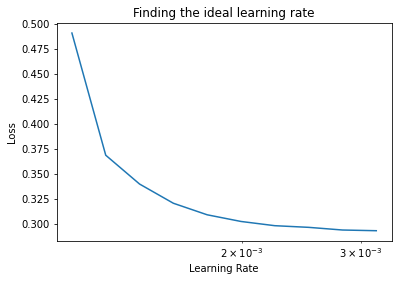

In [ ]:
lrs = 1e-3 * 10 ** (np.arange(1, 11) / 20)
plt.semilogx(lrs, history2.history["loss"])

plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# The the lowest is after 3 * 10^-3 . As we need to get back 10 times back. Lets take optimal lr = 0.001

# Model with optimum learning rate

In [ ]:
model3 = tf.keras.Sequential([
             tf.keras.layers.Flatten(input_shape = (28, 28)),
             tf.keras.layers.Dense(100, activation = "relu"),
             tf.keras.layers.Dense(100, activation = "relu"),   
             tf.keras.layers.Dense(10, activation = "softmax")                 

])

model3.compile(

    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = "accuracy"

)



history3 = model3.fit(X_train_norm, y_train, epochs = 10, validation_data=(X_test_norm, y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4885 - accuracy: 0.8225 - val_loss: 0.4024 - val_accuracy: 0.8555
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3635 - accuracy: 0.8683 - val_loss: 0.3639 - val_accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3295 - accuracy: 0.8780 - val_loss: 0.3524 - val_accuracy: 0.8745
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3115 - accuracy: 0.8845 - val_loss: 0.3549 - val_accuracy: 0.8716
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2945 - accuracy: 0.8904 - val_loss: 0.3515 - val_accuracy: 0.8766
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2788 - accuracy: 0.8948 - val_loss: 0.3321 - val_accuracy: 0.8812
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.8990 - val_loss: 0.3544 - val_accuracy:

# Evaluating Model




In [ ]:
model3.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3592 - accuracy: 0.8765


[0.3591814637184143, 0.8765000104904175]

In [ ]:
y_pred = model3.predict(X_test_norm)

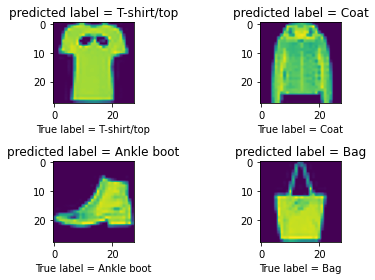

In [88]:


for i in range(1, 5):
  axes = plt.subplot(2, 2, i)
  ran = np.random.randint(0, len(X_test))
  
  plt.imshow(X_test[ran])
  plt.title(f"predicted label = {class_names[tf.argmax(y_pred[ran])]}" )
  plt.xlabel(f"True label = {class_names[y_test[ran]]}")

plt.tight_layout()
  

# Details about the model

In [90]:
model3.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_57 (Dense)            (None, 100)               78500     
                                                                 
 dense_58 (Dense)            (None, 100)               10100     
                                                                 
 dense_59 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [91]:
model3.layers

In [96]:
model3.layers[0].get_weights()

# The output is expected as there will be no weights in input layer

[]

In [104]:
# Lets see the weights of the first hidden layer

model3.layers[1].weights

[<tf.Variable 'dense_57/kernel:0' shape=(784, 100) dtype=float32, numpy=
 array([[ 0.1380296 ,  0.00632005,  0.04040105, ..., -0.08490103,
          0.0037901 , -0.14392258],
        [-0.15238187,  0.21868478, -0.06226686, ...,  0.1882737 ,
         -0.00978923,  0.14491734],
        [-0.04384134, -0.05525348,  0.05490864, ...,  0.44768324,
         -0.04119146, -0.14879036],
        ...,
        [ 0.19773813, -0.02016106,  0.11704664, ..., -0.03586232,
         -0.10237535,  0.16803224],
        [ 0.08223496, -0.1373087 ,  0.2590479 , ...,  0.12817422,
          0.00189848,  0.27880642],
        [ 0.24747814, -0.41406074, -0.06548243, ...,  0.07279631,
          0.00777229,  0.04003876]], dtype=float32)>,
 <tf.Variable 'dense_57/bias:0' shape=(100,) dtype=float32, numpy=
 array([ 0.27034098, -0.37405345,  0.04072476,  0.2251936 ,  0.00493916,
         0.10694931, -0.00390666,  0.48063025,  0.23823081,  0.1675609 ,
         0.19473663,  0.32140392, -0.21195668,  0.07884661,  0.10033258

In [101]:
# Lets see the biases of the first hidden layer

model3.layers[1].bias                        # The length is 100 as there are 100 neurons and bias will be there for each neuron

<tf.Variable 'dense_57/bias:0' shape=(100,) dtype=float32, numpy=
array([ 0.27034098, -0.37405345,  0.04072476,  0.2251936 ,  0.00493916,
        0.10694931, -0.00390666,  0.48063025,  0.23823081,  0.1675609 ,
        0.19473663,  0.32140392, -0.21195668,  0.07884661,  0.10033258,
        0.8316978 ,  0.67438316, -0.11318583, -0.14465068,  0.05462637,
       -0.6202811 ,  0.23191826, -0.47838542,  0.30187386,  0.13858902,
       -0.27923253,  0.09831216,  0.17763647, -0.01837877, -0.47418687,
       -0.03160759, -0.07417645,  0.01452127,  0.16655283,  0.538825  ,
        0.20840257,  0.42479798,  0.25492594,  0.0400485 ,  0.0764055 ,
        0.17897755,  0.23748481,  0.30233616,  0.42608237,  0.32146394,
       -0.48419696,  0.04932157, -0.12125205, -0.37050232,  0.11839054,
        0.00534941,  0.31534427,  0.03700486, -0.1709646 ,  0.00362516,
        0.21603072,  0.08569103,  0.15457404,  0.57399434,  0.5204599 ,
        0.19765818,  0.3293062 ,  0.32443097,  0.06309416,  0.41422632

# Plotting the model

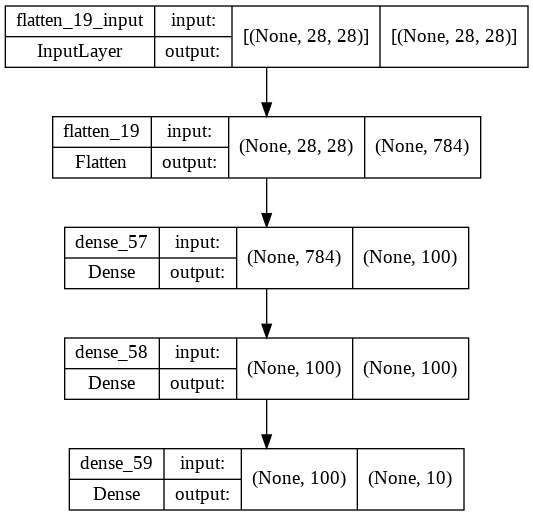

In [111]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model3, show_shapes=True)